# Зачет по МФК Математическая статистика и анализ данных
Исполнитель: Вакшин Александр (ВМК, 1 курс, 101 группа)

В нашем распоряжении датасет, содержащий информацию о совершенных внутренних авиарейсах из аэропортов Нью-Йорка в 2013 году. Наша задача – исследовать статистику задержек авиарейсов на основе предложенных ниже вопросов.

Описание датасета

Датасет представлен файлом csv, в котором 336 776 строк и 13 столбцов, содержащих
- year, month, day: date of departure;
- dep_time, arr_time: actual departure and arrival times (format HHMM or HMM), local timezone;
- dep_delay, arr_delay: departure and arrival delays, in minutes. Negative times represent early departures/arrivals;
- carrier: two letter carrier abbreviation;
- flight: flight number;
- tailnum: plane tail number;
- origin, dest: origin and destination airports;
- distance: distance between origin and destination airports.

(Справочно) Аббревиатуры аэропортов Нью-Йорка:
- JFK – John F. Kennedy International Airport;
- LGA – LaGuardia Airport;
- EWR – Newark International Airport.


In [58]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon
import matplotlib as mpl
from scipy import stats

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['figure.dpi'] = 80

In [59]:
# Загружаем данные
df = pd.read_csv('flights_NY.csv')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


# Задание 1

1. В каких колонках есть пропущенные значения? Сколько строк, в которых есть хотя бы одно пропущенное значение? Есть ли какая-то особенность в тех рейсах, в которых есть пропущенные значения? Удалите строки, в которых есть хотя бы одно пропущенное значение из дальнейшего анализа.

In [60]:
# Колонки, в которых пропущены значения
df.isna().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64

In [61]:
# Строки, в которых есть хотя бы одно пропущенное значение
df[df.isna().any(axis=1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


9430 строк, где пропущено хотя бы одно значение.

In [62]:
df.isna().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64

Особенность в рейсах, в которых есть пропущенные значения:

Все эти строки имеют пропуски в столбце  air_time, значит, эти рейсы, скорее всего, были отменены.

In [63]:
#Удаляем строки с пропусками
df = df.dropna()

# Задание 2

2. Постройте в одних осях нормированные гистограммы времени задержки вылета и прилета. Ограничьте диапазон построения гистограмм, чтобы избавиться от выбросов, и опишите характер выбросов (количество и значения). Есть ли другие особенности в полученных распределениях?

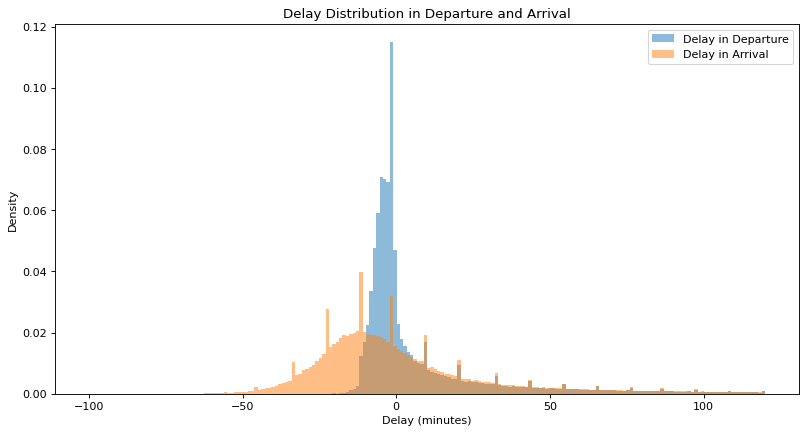

In [64]:
# Построим в одних осях нормированные гистограммы времени задержки вылета и прилета
plt.hist(df.dep_delay, bins=200, density=True, range = (-100, 120),  alpha=0.5, label='Delay in Departure')
plt.hist(df.arr_delay, bins=200, density=True, range = (-100, 120), alpha=0.5, label='Delay in Arrival')
plt.legend(loc='upper right')
plt.xlabel('Delay (minutes)')
plt.ylabel('Density')
plt.title('Delay Distribution in Departure and Arrival')
plt.show()

In [65]:
# Количество выбросов
print('Количество выбросов во времени задержки отправления',(df.dep_delay>120).sum())
print('Количество выбросов во времени задержки прилета',(df.arr_delay>120).sum())

Количество выбросов во времени задержки отправления 9597
Количество выбросов во времени задержки прилета 10034


Опишем характер выбросов и другие особенности в полученных распределениях:

Распределения времени задержек прилета и вылета с правосторонней асимметрией. Есть выбросы с экстремально большими значениями. Все, что больше 120 минут, будем считать выбросами. 
Время задержки прилета более симметричное, то есть самолеты достаточно часто прилетают раньше.

# Задание 3

3. Оцените среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета.

In [66]:
df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,327346.000000,327346.000000
mean,12.555156,6.895377
std,40.065688,44.633292
min,-43.000000,-86.000000
25%,-5.000000,-17.000000
50%,-2.000000,-5.000000
75%,11.000000,14.000000
max,1301.000000,1272.000000


dep_delay (время задержки вылета):
- среднее значение: 12.6 мин
- медиана: -2 мин
- стандартное отклонение: 40.1 мин

arr_delay (время задержки прилета):
- среднее значение: 6.9 мин
- медиана: -5 мин
- стандартное отклонение: 44.6 мин

# Задание 4

4. Отсортируйте авиакомпании по величине средней задержки вылета и приведите среднюю задержку вылета вместе с 95%-доверительным интервалом по каждой авиакомпании. Результат представьте в виде графика.

In [67]:
z = norm.ppf(1-0.05/2)
# Отсортируем авиакомпании по величине средней задержки вылета
df_1 = df.groupby('carrier')['dep_delay'].agg(['mean', 'std', 'count']).sort_values('mean')
# Приведем среднюю задержку вылета вместе с 95%-доверительным интервалом по каждой компании
# Полуширина доверительного интервала
df_1['error'] = z*df_1['std']/np.sqrt(df_1['count'])
df_1

,mean,std,count,error
carrier,,,,
US,3.744693,27.939106,19831,0.388856
HA,4.900585,74.109901,342,7.854369
AS,5.830748,31.426798,709,2.313264
AA,8.569130,37.365267,31947,0.409733
DL,9.223950,39.656296,47658,0.356035
MQ,10.445381,39.025198,25037,0.483395
UA,12.016908,35.547921,57782,0.289845
OO,12.586207,43.065994,29,15.674134
VX,12.756646,44.016255,5116,1.206135


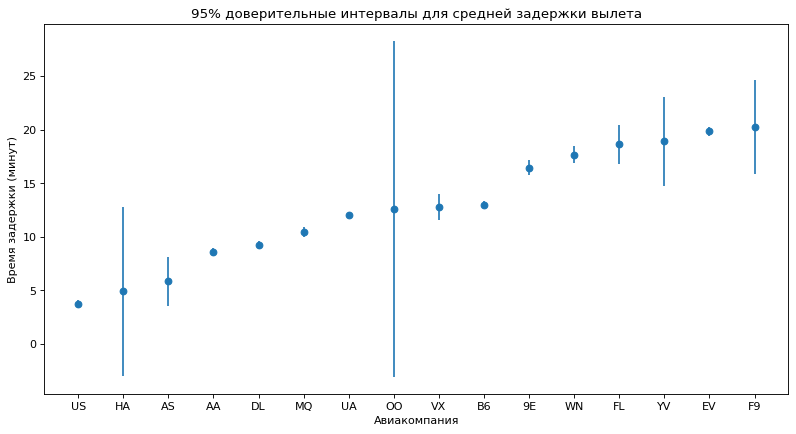

In [68]:
# Результат представим в виде графика
plt.title('95% доверительные интервалы для средней задержки вылета')
plt.errorbar(range(len(df_1)), df_1['mean'], yerr=df_1['error'], fmt='o')
plt.xticks (ticks=range(len(df_1)), labels=df_1.index) 
plt.xlabel('Авиакомпания')
plt.ylabel('Время задержки (минут)')
plt.show()

Отсортировали по средней задержке вылета. Некоторые доверительные интервалы получились очень широкие по причине малого числа наблюдений.

# Задание 5

5. Значимо ли различие в среднем времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL)? На каком уровне значимости можно отвергнуть гипотезу о равенстве средних?

In [69]:
df_1.loc[['AA','DL'], :]

,mean,std,count,error
carrier,,,,
AA,8.56913,37.365267,31947,0.409733
DL,9.22395,39.656296,47658,0.356035


Количество наблюдений для каждой авиакомпании достаточно большое, также выборочные дисперсии практически не различаются. Поэтому используем t-test с предположением одинаковой дисперсии.

In [70]:
stats.ttest_ind(df[df.carrier == 'AA']['dep_delay'], df[df.carrier == 'DL']['dep_delay'], equal_var=True)

Ttest_indResult(statistic=-2.3368324651397754, pvalue=0.019450363520510508)

- На уровне значимости 0.05 различие в средней задержке вылета значимо (гипотеза о равенстве средних отвергается, так как p-value < 0.05).

# Задание 6

6. Сравните между собой аэропорты вылета (JFK, LGA, EWR) с точки зрения статистики задержек вылетов. Являются ли различия статистически значимыми?

In [71]:
# Сравним задержки вылетов
df.groupby('origin')['dep_delay'].mean()

origin
EWR    15.009110
JFK    12.023607
LGA    10.286583
Name: dep_delay, dtype: float64

В наших данных аэропорт 'EWR' имеет самое большое среднее время задержки вылета, а 'LGA' - наименьшее.

Проверим, значимо ли различаются в среднем три аэропорта по времени вылета, используя однофакторный дисперсионный анализ.

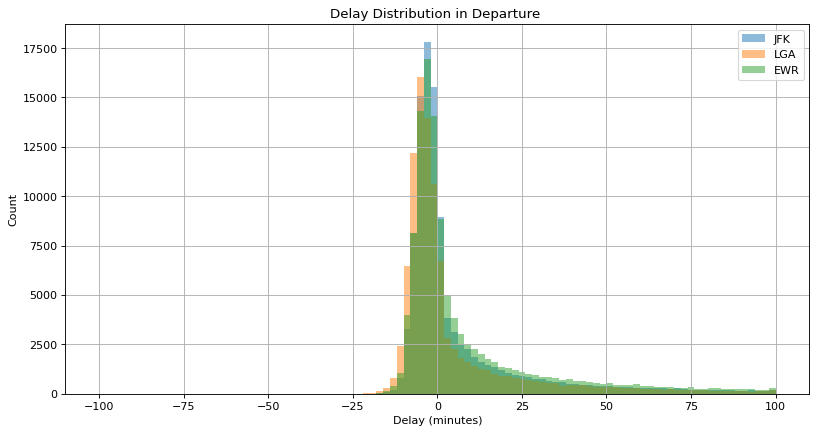

In [72]:
df[df.origin == 'JFK']['dep_delay'].hist(bins=100, alpha=0.5, range = (-100, 100), label = 'JFK')
df[df.origin == 'LGA']['dep_delay'].hist(bins=100, alpha=0.5, range = (-100, 100), label = 'LGA')
df[df.origin == 'EWR']['dep_delay'].hist(bins=100, alpha=0.5, range = (-100, 100), label = 'EWR')
plt.legend(loc='upper right')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.title('Delay Distribution in Departure ')
plt.show()

In [73]:
stats.f_oneway(df[df.origin == 'JFK']['dep_delay'],
               df[df.origin == 'LGA']['dep_delay'],
               df[df.origin == 'EWR']['dep_delay'])

F_onewayResult(statistic=392.3539088643125, pvalue=6.408773574198642e-171)

p-value < 0.05 (намного меньше), поэтому гипотезу о равенстве средних задержек вылета отвергаем. Различия статистически значимы.

# Задание 7

7. Каким распределением можно описать распределение времени задержки вылета в диапазоне, где время задержки вылета > 0? Предложите общий вид распределения и оцените его параметры. На одном рисунке изобразите гистограмму и график плотности аппроксимирующего распределения.

In [74]:
df_7 = df[df.dep_delay>0]['dep_delay']

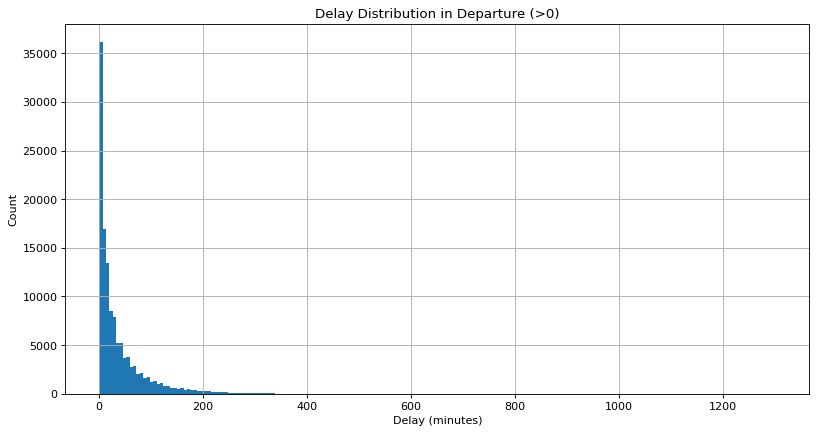

In [75]:
df_7.hist(bins=200)
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.title('Delay Distribution in Departure (>0)')
plt.show()

Время задержки вылета (в диапазоне, где время задержки вылета > 0) можно аппроксимировать экспоненциальным распределением. Оценим его параметр лямбда, как 1 поделить на среднее время задержки вылета.

In [76]:
lambda_ = 1/df_7.mean()
lambda_

0.025485840988861405

In [77]:
# Найдем теоретические значения плотности в некоторых точках
x = range(400)
dencity_teor = [expon(scale = 1/lambda_).pdf(i) for i in x]

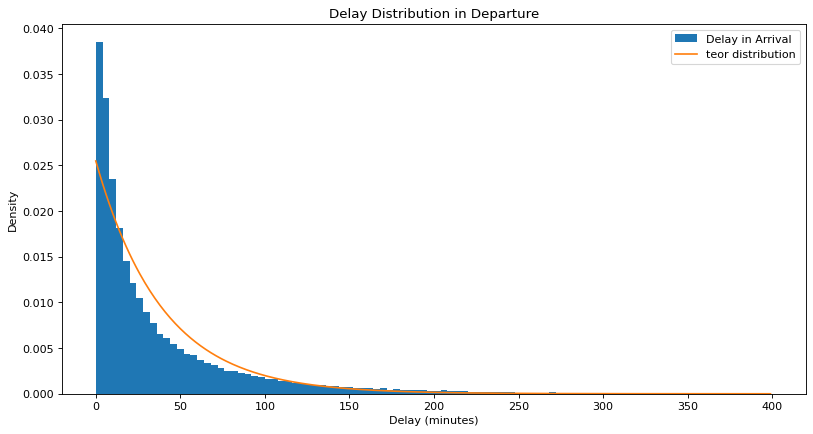

In [78]:
# На одном рисунке изобразим гистограмму и график плотности аппроксимирующего распределения
plt.hist(df_7, bins=100, density=True,  label='Delay in Arrival', range = (0,400))
plt.plot(x, dencity_teor, label = 'teor distribution')
plt.legend(loc='upper right')
plt.xlabel('Delay (minutes)')
plt.ylabel('Density')
plt.title('Delay Distribution in Departure')
plt.show()

# Задание 8

8. Для тех рейсов, для которых задержка вылета > 0, постройте в одних осях графики числа рейсов в месяц и среднего времени задержки в месяц. Найдите коэффициент корреляции между полученными значениями. Постройте точечную диаграмму (scatterplot), показывающую зависимость между полученными значениями (по оси Х отложите число рейсов в месяц). Нанесите на график линию регрессии. Выпишите уравнение регрессии.

In [79]:
# Cначала сгруппируем данные
df_8 = df[df.dep_delay>0].groupby(['month'])['dep_delay'].agg(['mean', 'count'])
df_8

,mean,count
month,,
1,35.241788,9620
2,35.176056,9088
3,39.515404,11166
4,44.055322,10484
5,39.093525,11227
6,49.631550,12558
7,48.548827,13773
8,37.224518,11665
9,35.517415,7752


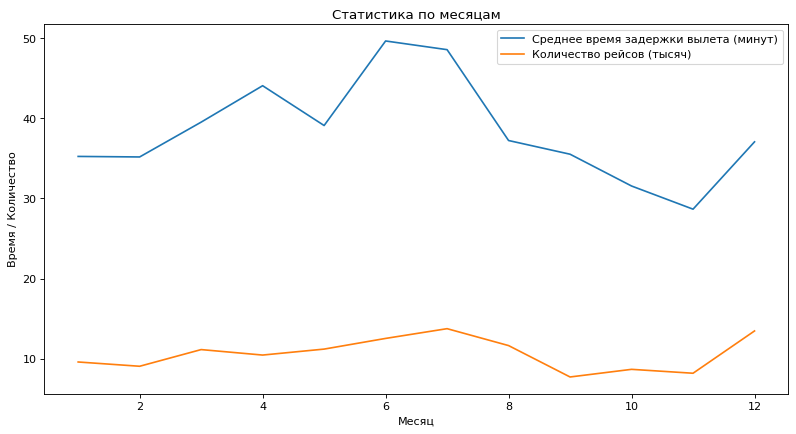

In [80]:
# Построим в одних осях графики числа рейсов в месяц и среднего времени задержки в месяц
plt.plot(df_8.index, df_8['mean'], label = 'Среднее время задержки вылета (минут)')
plt.plot(df_8.index, df_8['count']/1000, label = 'Количество рейсов (тысяч)')
plt.legend(loc='upper right')
plt.xlabel('Месяц')
plt.ylabel('Время / Количество')
plt.title('Статистика по месяцам')
plt.show()

In [ ]:
# Найдем коэффициент корреляции между полученными значениями
df_8.corr()['mean']['count']

0.7288370677699052

Построим точечную диаграмму (scatterplot), показывающую зависимость между полученными значениями и нанесем на график линию регрессии.

In [ ]:
from scipy.stats import linregress
# Линия регрессии
slope, intercept, rvalue, pvalue, stderr = linregress(df_8['count'], df_8['mean'])
print(f"Уравнение регрессии: y = {slope:.4f}x + {intercept:.2f}")


Уравнение регрессии: y = 0.0023x + 14.21


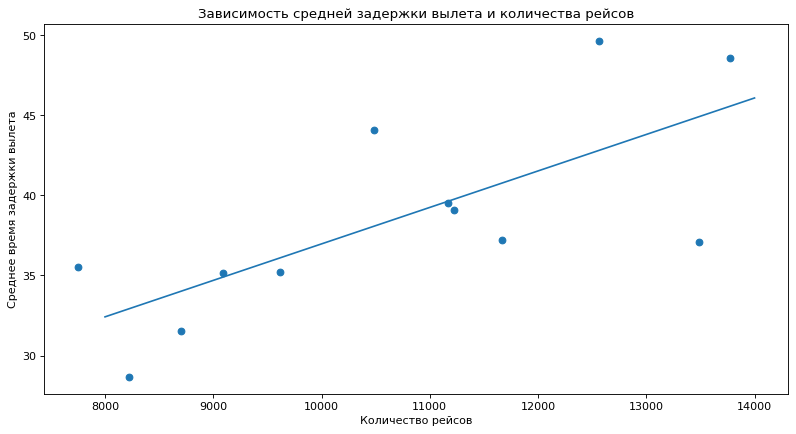

In [ ]:
# Точечная диаграмма
plt.scatter(df_8['count'], df_8['mean'])
plt.plot([i for i in range(8000, 14000)], [slope*i + intercept for i in range(8000, 14000)])
plt.xlabel('Количество рейсов')
plt.ylabel('Среднее время задержки вылета')
plt.title('Зависимость средней задержки вылета и количества рейсов')
plt.show()

Корреляция между этими двумя величинами высокая и прямая. То есть чем больше рейсов в месяц, тем выше среднее время задержки вылета.

# Задание 9

9. Постройте график среднего времени задержки в зависимости от часа вылета. На отдельном графике постройте долю рейсов, для которых задержка > 0, в зависимости от часа вылета. Опишите словами наблюдаемую картину.

In [ ]:
# Выделим час вылета
df['dep_hour'] = (df.dep_time/100).astype('int')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,dep_hour
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5


In [ ]:
#Cначала сгруппируем данные
def er(x):
    return (x>0).sum()/len(x)

df_8 = df.groupby(['dep_hour'])[['dep_delay']].mean()
df_8['proportion'] = df.groupby(['dep_hour'])['dep_delay'].apply(er)
df_8

,dep_delay,proportion
dep_hour,,
0,129.287671,1.000000
1,206.755656,1.000000
2,236.253968,1.000000
3,304.727273,1.000000
4,-5.554098,0.000000
5,-4.356293,0.050622
6,-1.521810,0.181818
7,0.214723,0.207343
8,1.092312,0.234118


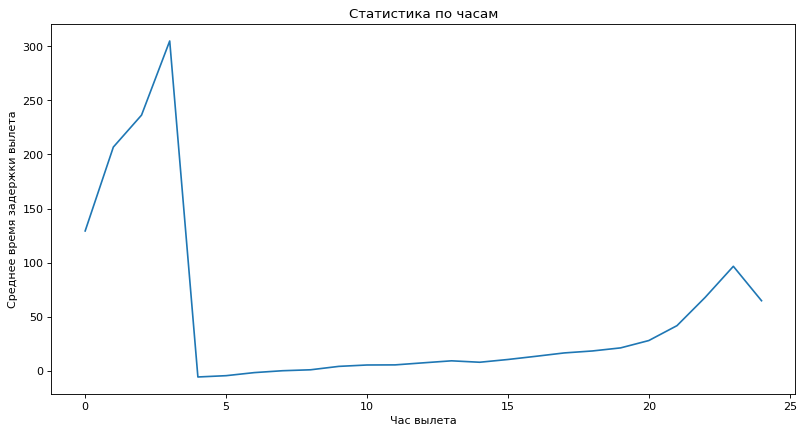

In [ ]:
# График среднего времени задержки в зависимости от часа вылета
plt.plot(df_8['dep_delay'])
plt.xlabel('Час вылета')
plt.ylabel('Среднее время задержки вылета')
plt.title('Статистика по часам')
plt.show()

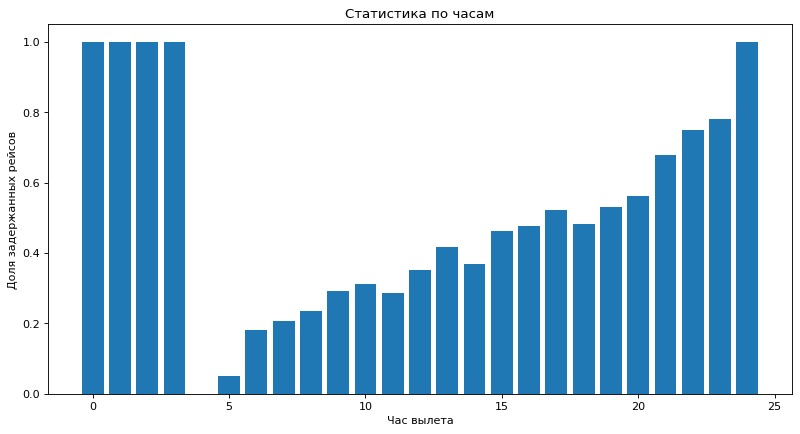

In [ ]:
# Доля рейсов, для которых задержка > 0, в зависимости от часа вылета
plt.bar(df_8.index, df_8['proportion'])
plt.xlabel('Час вылета')
plt.ylabel('Доля задержанных рейсов')
plt.title('Статистика по часам')
plt.show()

Заметим, что в ночные часы среднее время задержки намного больше, как и доля задержанных рейсов. С 23 до 4 часов все рейсы были задержаны.

# Задание 10

10. Предложите способ разделить авиакомпании на пунктуальные и непунктуальные. Какие авиакомпании в какую группу попадают? Будут ли различаться группы в зависимости от дальности перелета?

Давайте разделим компании на пунктуальные и непунктуальные по частоте опозданий на вылет. Сначала посмотрим на эту частоту.

In [ ]:
def er(x):
    return (x>0).sum()/len(x)

df_10= df.groupby(['carrier'])['dep_delay'].apply(er).sort_values()
df_10

carrier
HA    0.201754
US    0.240129
OO    0.310345
AA    0.316305
AS    0.317348
MQ    0.318169
DL    0.318645
B6    0.395419
9E    0.403608
YV    0.426471
VX    0.433151
EV    0.449558
UA    0.469437
F9    0.499266
FL    0.518740
WN    0.542594
Name: dep_delay, dtype: float64

Компании, у которых частота опозданий до 0.4 - будем считать пунктуальными.

Тогда пунктуальные компании: HA, US, OO, AA, AS, MQ, DL, B6.

Непунктуальные:  9E, YV, VX, EV, UA, F9, FL, WN.

Посмотрим, какие компании куда попадут, если дальность перелета больше 1000 миль (зависимость от дальности перелета).

In [ ]:
df_10_1= df[df.distance>1000].groupby(['carrier'])['dep_delay'].apply(er).sort_values()
df_10_1[df_10_1<0.4]

carrier
HA    0.201754
MQ    0.264168
US    0.302679
AS    0.317348
DL    0.326248
AA    0.327500
Name: dep_delay, dtype: float64

In [ ]:
df_10_1

carrier
HA    0.201754
MQ    0.264168
US    0.302679
AS    0.317348
DL    0.326248
AA    0.327500
B6    0.413877
VX    0.433151
EV    0.447163
9E    0.464062
UA    0.478453
F9    0.499266
OO    0.500000
WN    0.572908
Name: dep_delay, dtype: float64

В этом случае группы различаются: например, компания OO попала в конец списка (стала непунктуальной). 

# Задание 11

11. Предложите модель, дающую прогноз средней задержки вылета по каждому аэропорту на следующий день. Какие признаки вы будете использовать, на каких данных будете обучать (настраивать) модель, на каких тестировать? Оцените точность вашей модели. В частности, сделайте прогноз на 31 декабря 2013 года и сравните с фактическим значением (исключите эту дату из обучающей и тестовой выборки).

В качестве признаков будем использовать (известны заранее):
1. Среднюю дистанцию, которую планируется пролететь 
2. Количество рейсов 
3. Доля пунктуальных перевозчиков на назначенный день

## Для аэропорта EWR

In [ ]:
# Подготовим данные
def carrier(row):
    k=0
    for i in row:
        if i in ['HA', 'US', 'OO', 'AA', 'AS', 'MQ', 'DL', 'B6']:
            k+=1
    return k/len(row)

df_11 = df[df.origin=='EWR'].groupby(['month', 'day'], as_index=True)[['dep_delay', 'distance']].mean()
df_11['count'] = df[df.origin=='EWR'].groupby(['month', 'day'], as_index=True)[['dep_delay']].count()
df_11['carrier'] = df[df.origin=='EWR'].groupby(['month', 'day'], as_index=True)['carrier'].apply(carrier)
df_11

dep_delay     distance  count   carrier
month day                                         
1     1    17.296667  1039.803333    300  0.193333
      2    25.123167  1010.390029    341  0.187683
      3     8.522659   984.640483    331  0.196375
      4    12.103858   969.412463    337  0.183976
      5     5.696203  1042.974684    237  0.223629
...              ...          ...    ...       ...
12    27   16.256560  1099.708455    343  0.186589
      28    8.768421  1147.336842    285  0.203509
      29   29.580205  1154.105802    293  0.197952
      30   16.730435  1120.773913    345  0.176812
      31    9.776923  1159.700000    260  0.234615

[365 rows x 4 columns]

Последний день (31 декабря 2013 года) оставим для прогноза. Остальные данные перемешаем: возьмем случайные 300 наблюдений для построения модели, а на остальных (64 дня) проверим качество работы нашей модели.

In [ ]:
from sklearn.utils import shuffle
# Перемешиваем данные, исключая 31 декабря
df_shuffle = shuffle(df_11.iloc[:-1])

X_train, X_test, X_val = (df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[300:],
                         df_11.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[364])

y_train, y_test, y_val = (df_shuffle.reset_index(drop=True)['dep_delay'].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)['dep_delay'].iloc[300:],
                         df_11.reset_index(drop=True)['dep_delay'].iloc[364])

Применим алгоритм случайного леса и в качестве метрики используем MAPE.

Построим модель с глубиной деревьев 10:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
# Построим модель
rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)
# Оценим точность модели
mape_train = mean_absolute_percentage_error(y_train, rf.predict(X_train))
mape_test = mean_absolute_percentage_error(y_test, rf.predict(X_test))
print(f'MAPE на train:  {round(mape_train*100, 2)}%')
print(f'MAPE на test:   {round(mape_test*100, 2)}%')

MAPE на train:  160.71%
MAPE на test:   227.49%


Точность модели: в среднем наш прогноз отличается от истинного примерно на 200% на тестовой выборке.

In [ ]:
# Прогноз модели
rf.predict([X_val])

C:\Users\RobotComp.ru\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([30.48869788])

In [ ]:
# Фактическое значение
y_val

9.776923076923078

Наш прогноз на 31 декабря составил 30.5 минуты, в то время как фактическое значение составляет 9.8 минут.

Качество модели не очень хорошее.

## Для аэропорта JFK 

In [ ]:
# Подготовим данные
df_11 = df[df.origin=='JFK'].groupby(['month', 'day'], as_index=True)[['dep_delay', 'distance']].mean()
df_11['count'] = df[df.origin=='JFK'].groupby(['month', 'day'], as_index=True)[['dep_delay']].count()
df_11['carrier'] = df[df.origin=='JFK'].groupby(['month', 'day'], as_index=True)['carrier'].apply(carrier)
df_11

dep_delay     distance  count   carrier
month day                                         
1     1    12.061017  1297.142373    295  0.823729
      2     8.217666  1281.350158    317  0.791798
      3    13.463722  1263.536278    317  0.769716
      4    10.490506  1264.560127    316  0.765823
      5     7.730000  1228.810000    300  0.770000
...              ...          ...    ...       ...
12    27    9.378549  1326.820189    317  0.813880
      28   11.036789  1298.204013    299  0.819398
      29   25.757282  1327.880259    309  0.815534
      30    9.638710  1336.222581    310  0.819355
      31    7.598566  1297.150538    279  0.838710

[365 rows x 4 columns]

In [ ]:
# Перемешиваем данные, исключая 31 декабря
df_shuffle = shuffle(df_11.iloc[:-1])

X_train, X_test, X_val = (df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[300:],
                         df_11.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[364])

y_train, y_test, y_val = (df_shuffle.reset_index(drop=True)['dep_delay'].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)['dep_delay'].iloc[300:],
                         df_11.reset_index(drop=True)['dep_delay'].iloc[364])
# Построим модель
rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)
# Оценим точность модели
mape_train = mean_absolute_percentage_error(y_train, rf.predict(X_train))
mape_test = mean_absolute_percentage_error(y_test, rf.predict(X_test))
print(f'MAPE на train:  {round(mape_train*100, 2)}%')
print(f'MAPE на test:   {round(mape_test*100, 2)}%')

MAPE на train:  684.95%
MAPE на test:   167.3%


In [ ]:
# Прогноз модели
rf.predict([X_val])

C:\Users\RobotComp.ru\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.19758597])

In [ ]:
# Фактическое значение
y_val

7.598566308243727

Построение модели для этого аэропорта аналогично предыдущему. Для этого аэропорта качество модели чуть лучше. Примерно 170% MAPE. Прогноз на 31 декабря 13.2 минуты, в то время как фактическое время задержки вылета составляет 7.6 минут.

## Для аэропорта LGA

In [ ]:
# Подготовим данные
df_11 = df[df.origin=='LGA'].groupby(['month', 'day'], as_index=True)[['dep_delay', 'distance']].mean()
df_11['count'] = df[df.origin=='LGA'].groupby(['month', 'day'], as_index=True)[['dep_delay']].count()
df_11['carrier'] = df[df.origin=='LGA'].groupby(['month', 'day'], as_index=True)['carrier'].apply(carrier)
df_11

dep_delay    distance  count   carrier
month day                                        
1     1     3.203390  843.669492    236  0.745763
      2     5.633333  841.951852    270  0.774074
      3    10.825397  823.321429    252  0.746032
      4     2.929412  827.827451    255  0.752941
      5     2.450000  839.172222    180  0.766667
...              ...         ...    ...       ...
12    27    6.581395  823.262458    301  0.691030
      28    3.013100  866.799127    229  0.689956
      29    9.650376  834.026316    266  0.710526
      30    4.855705  830.718121    298  0.681208
      31    2.631818  842.740909    220  0.709091

[365 rows x 4 columns]

In [ ]:
# Перемешиваем данные, исключая 31 декабря
df_shuffle = shuffle(df_11.iloc[:-1])

X_train, X_test, X_val = (df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[300:],
                         df_11.reset_index(drop=True)[['distance', 'count', 'carrier']].iloc[364])

y_train, y_test, y_val = (df_shuffle.reset_index(drop=True)['dep_delay'].iloc[0:300], 
                         df_shuffle.reset_index(drop=True)['dep_delay'].iloc[300:],
                         df_11.reset_index(drop=True)['dep_delay'].iloc[364])
# Построим модель
rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)
# Оценим точность модели
mape_train = mean_absolute_percentage_error(y_train, rf.predict(X_train))
mape_test = mean_absolute_percentage_error(y_test, rf.predict(X_test))
print(f'MAPE на train:  {round(mape_train*100, 2)}%')
print(f'MAPE на test:   {round(mape_test*100, 2)}%')

MAPE на train:  214.17%
MAPE на test:   305.56%


In [ ]:
# Прогноз модели
rf.predict([X_val])

C:\Users\RobotComp.ru\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.7326246])

In [ ]:
# Фактическое значение
y_val

2.631818181818182

Построение модели для этого аэропорта аналогично предыдущему. Для этого аэропорта качество модели примерно 300% MAPE на тестовой выборке. Прогноз на 31 декабря составляет 5.7 минуты, в то время как файктическое время задержки - 2.6 минуты.

# Задание 12

12. Приведите еще хотя бы один интересный факт из датасета, раскрывающий или характеризующий особенности в возникновении/распределении задержек авиарейсов.

Посмотрим на различие в среднем времени задержки вылета в зависимости от дистанции перелета.

Сгруппируем короткие (не больше 1000 миль) и длинные (больше 1000 миль) перелеты. Отобразим результат на графике.

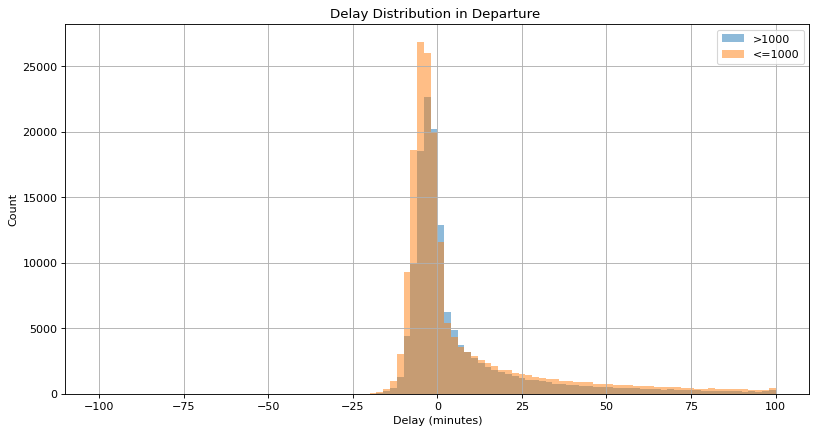

In [ ]:
df[df.distance>1000]['dep_delay'].hist(bins=100, range = (-100, 100), alpha = 0.5, label = '>1000')
df[df.distance<=1000]['dep_delay'].hist(bins=100, range = (-100, 100), alpha = 0.5, label = '<=1000')
plt.legend(loc='upper right')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.title('Delay Distribution in Departure ')
plt.show()

In [ ]:
# Средние значения наборов
print(df[df.distance>1000]['dep_delay'].mean())
print(df[df.distance<=1000]['dep_delay'].mean())

11.45256714933127
13.42923644807606


In [ ]:
stats.ttest_ind(df[df.distance>1000]['dep_delay'], df[df.distance<1000]['dep_delay'])

Ttest_indResult(statistic=-14.023072532707856, pvalue=1.1604010653744815e-44)

Выборочное среднее время задержки у коротких перелетов больше. При этом эта разница статистически значима (p-value < 0.05).